# **Data Modelling**

#### **The data has been extracted from Twitter using the API Keys**

### **Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# reading the data

df = pd.read_csv('tweets.csv')

In [ ]:
df.head()

,tweets,label
0,laurenboebert think god would want us emul tru...,4
1,everyon react cancel ava say f slur ...,6
2,slut whore skank cunt loser...,3
3,janeygodley headlandhotel look back photo yo...,6
4,fat ugly rat area within x mile whataburg,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  2887 non-null   object
 1   label   2888 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.2+ KB


In [ ]:
df.describe()

,label
count,2888.000000
mean,3.957410
std,1.949462
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [ ]:
df.shape

(2888, 2)

In [ ]:
df['label'].value_counts()

6    1143
1     486
4     461
2     411
3     258
5     129
Name: label, dtype: int64

In [ ]:
# checking for null values if any

df.isna().sum()

tweets    1
label     0
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 0 to 2887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tweets  2887 non-null   bool 
 1   label   2887 non-null   bool 
dtypes: bool(2)
memory usage: 28.2 KB


# **EDA**

Text(0, 0.5, 'Frequency')

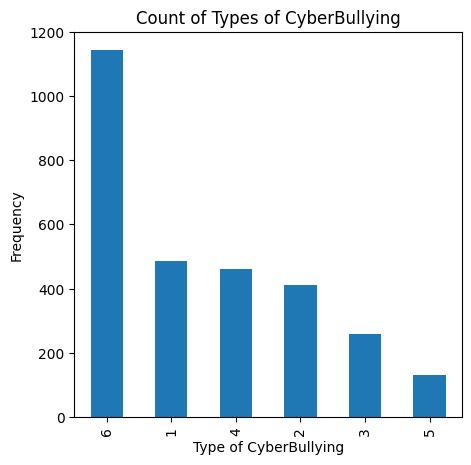

In [ ]:
plt.figure(figsize = (5, 5))
df.label.value_counts().plot.bar()

plt.title("Count of Types of CyberBullying")
plt.xlabel('Type of CyberBullying')
plt.ylabel('Frequency')

In [ ]:
all_tweets = ' '.join([text for text in df['tweets']])

In [ ]:
from wordcloud import WordCloud

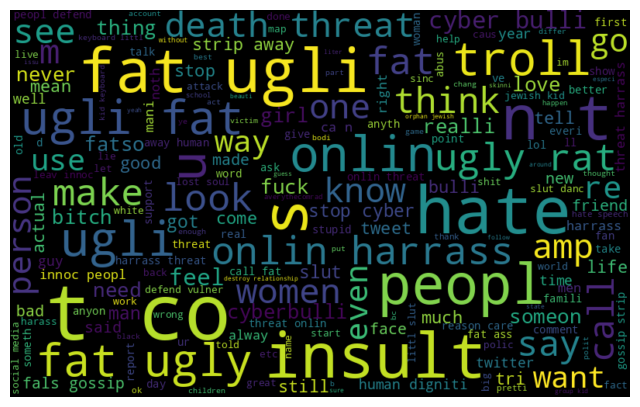

In [ ]:
wc = WordCloud(width = 800, height = 500, random_state = 0,
               max_font_size = 100, background_color = 'black').generate(all_tweets)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

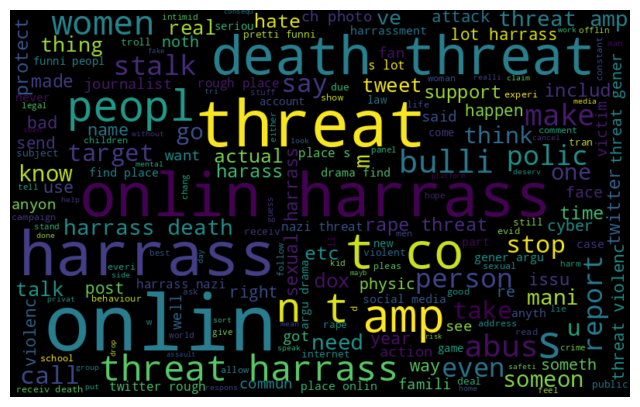

In [ ]:
harrassment =' '.join([text for text in df['tweets'][df['label'] == 1]])

wc=WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(harrassment)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

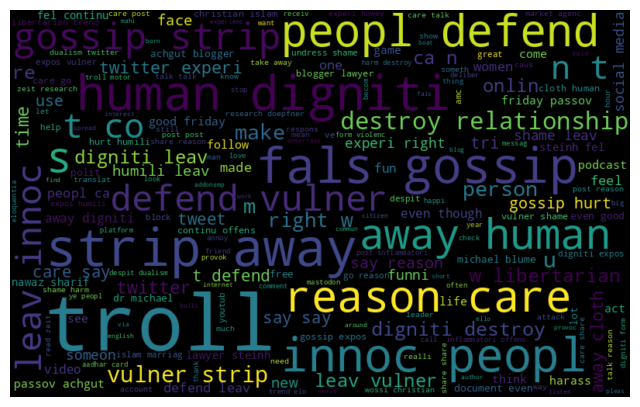

In [ ]:
trolling =' '.join([text for text in df['tweets'][df['label'] == 2]])

wc=WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(trolling)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

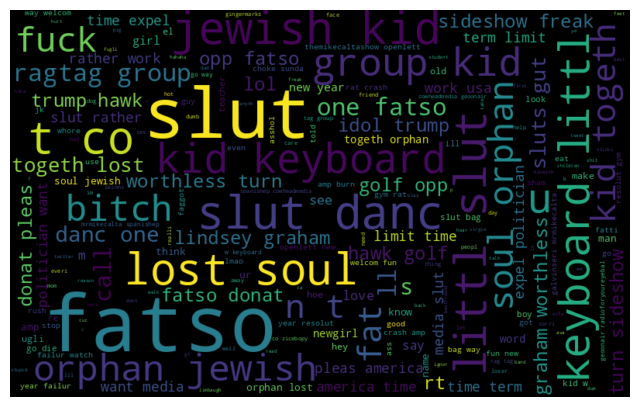

In [ ]:
fatso =' '.join([text for text in df['tweets'][df['label'] == 3]])

wc=WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(fatso)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

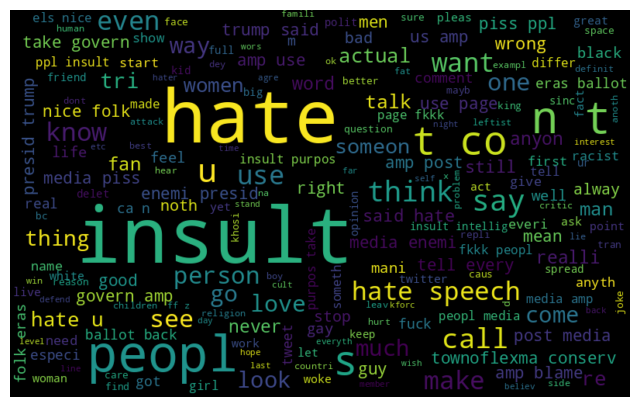

In [ ]:
insult =' '.join([text for text in df['tweets'][df['label'] == 4]])

wc=WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(insult)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

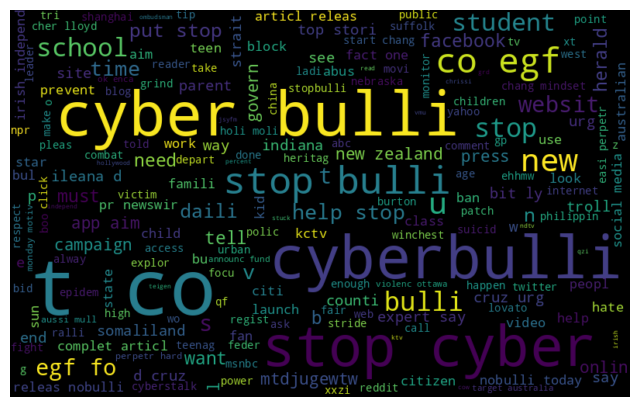

In [ ]:
cyber_bullying =' '.join([text for text in df['tweets'][df['label'] == 5]])

wc=WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(cyber_bullying)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

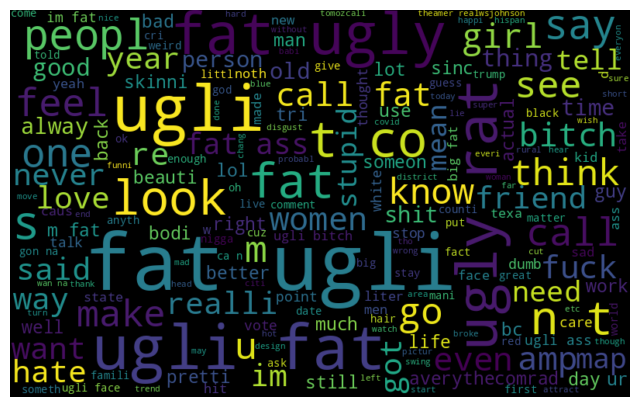

In [ ]:
body_shamming =' '.join([text for text in df['tweets'][df['label'] == 6]])

wc=WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(body_shamming)

plt.figure(figsize=(8,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re

def most_repeated_words(x):
  words = []
  for i in x:
    wd = re.findall(r'\w+', i)
    words.append(wd)
  return words

In [ ]:
wd_harrassment = most_repeated_words(df['tweets'][df['label']==1])
wd_trolling = most_repeated_words(df['tweets'][df['label']==2])
wd_fatso = most_repeated_words(df['tweets'][df['label']==3])
wd_insult = most_repeated_words(df['tweets'][df['label']==4])
wd_cyber_bullying = most_repeated_words(df['tweets'][df['label']==5])
wd_body_shamming = most_repeated_words(df['tweets'][df['label']==6])

In [ ]:
wd_harrassment=sum(wd_harrassment,[])
wd_trolling=sum(wd_trolling,[])
wd_fatso=sum(wd_fatso,[])
wd_insult=sum(wd_insult,[])
wd_cyber_bullying=sum(wd_cyber_bullying,[])
wd_body_shamming=sum(wd_body_shamming,[])

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

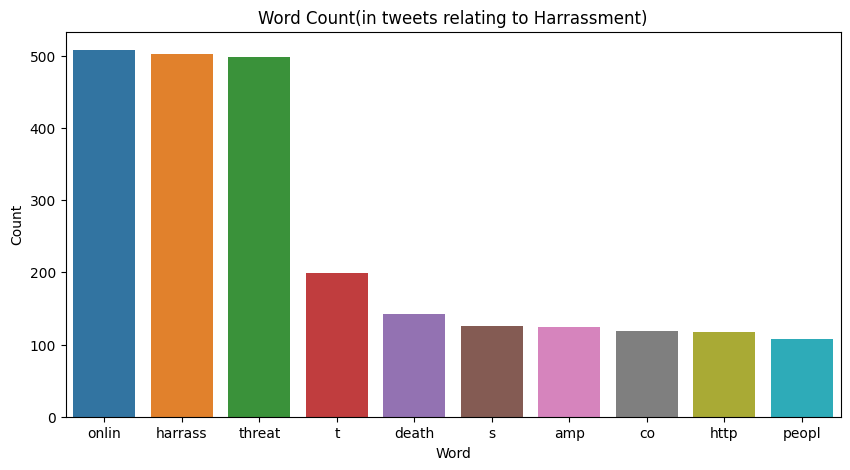

In [ ]:
a=nltk.FreqDist(wd_harrassment)
d=pd.DataFrame({'Word':list(a.keys()),
                 'Count':list(a.values())})

d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(10,5))
ax=sns.barplot(data=d,x="Word",y="Count")
ax.set(ylabel="Count")
ax.set(title="Word Count(in tweets relating to Harrassment)")
plt.show()

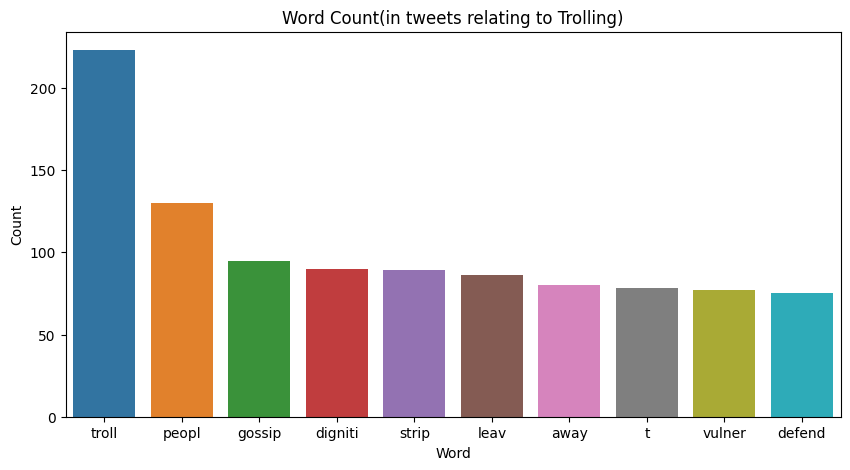

In [ ]:
a=nltk.FreqDist(wd_trolling)
d=pd.DataFrame({'Word':list(a.keys()),
                 'Count':list(a.values())})

d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(10,5))
ax=sns.barplot(data=d,x="Word",y="Count")
ax.set(ylabel="Count")
ax.set(title="Word Count(in tweets relating to Trolling)")
plt.show()

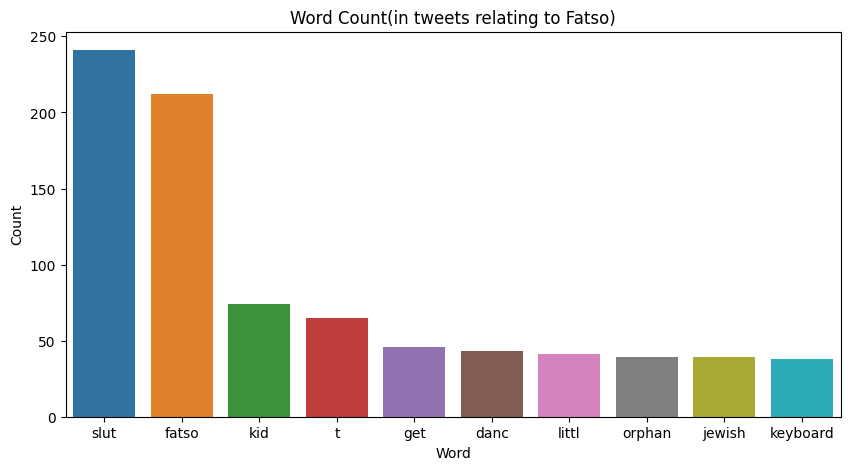

In [ ]:
a=nltk.FreqDist(wd_fatso)
d=pd.DataFrame({'Word':list(a.keys()),
                 'Count':list(a.values())})

d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(10,5))
ax=sns.barplot(data=d,x="Word",y="Count")
ax.set(ylabel="Count")
ax.set(title="Word Count(in tweets relating to Fatso)")
plt.show()

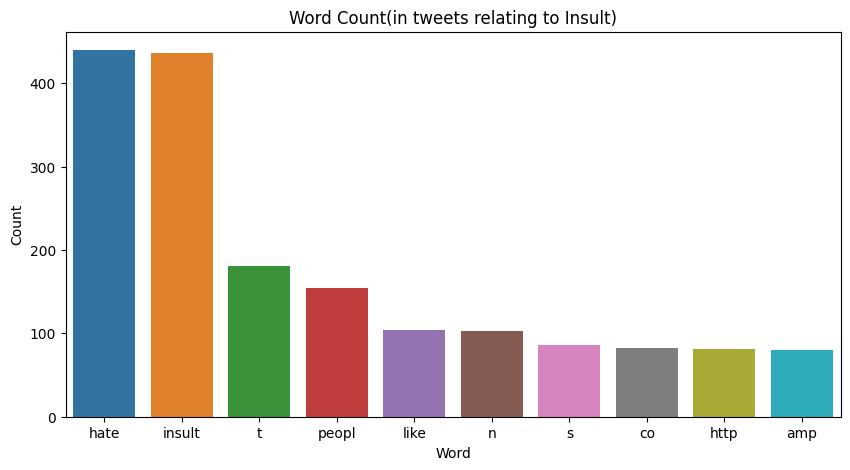

In [ ]:
a=nltk.FreqDist(wd_insult)
d=pd.DataFrame({'Word':list(a.keys()),
                 'Count':list(a.values())})

d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(10,5))
ax=sns.barplot(data=d,x="Word",y="Count")
ax.set(ylabel="Count")
ax.set(title="Word Count(in tweets relating to Insult)")
plt.show()

# **MODELLING**

# **CountVectoriser**

Since machines are not capable of reading text data, we need to convert it into numeric structure for the machine to understand and determine the patterns in it.

# **TfidfTransformer**

To use the BagofWords (BoW) model that is CountVectoriser, we use TfidfTransformer to apply the frequency weighting.

## **Training the model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier #for multi-class classification

In [ ]:
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

## **Splitting the data into training and testing**

In [ ]:
#y = df['label']
#x = df.drop(['label'], axis = 1)

x = df.iloc[:, 0]
y = df.iloc[:, -1]

In [ ]:
x.head()

0    laurenboebert think god would want us emul tru...
1    everyon react cancel ava           say f slur ...
2    slut      whore      skank      cunt     loser...
3    janeygodley   headlandhotel look back photo yo...
4           fat ugly rat  area within x mile whataburg
Name: tweets, dtype: object

In [ ]:
y.head()

0    4
1    6
2    3
3    6
4    6
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                    random_state = 0)

In [ ]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (2020,)
Shape of x_test: (867,)
Shape of y_train: (2020,)
Shape of y_test: (867,)


# **Stochastic Gradient Descent**

In [ ]:
# fitting the model

model1 = pipeline_sgd.fit(x_train, y_train)
y_predict = model1.predict(x_test)

In [ ]:
y_predict[0:100]

array([2, 6, 4, 6, 6, 4, 4, 4, 6, 4, 6, 5, 2, 6, 2, 4, 1, 3, 5, 6, 6, 6,
       6, 6, 6, 3, 4, 3, 6, 6, 4, 6, 1, 6, 5, 5, 6, 6, 6, 4, 3, 6, 1, 5,
       1, 5, 4, 4, 6, 6, 6, 2, 6, 2, 3, 6, 1, 3, 4, 6, 6, 6, 4, 4, 6, 4,
       4, 5, 6, 2, 6, 6, 2, 1, 4, 6, 6, 6, 3, 2, 4, 4, 1, 1, 6, 2, 3, 6,
       5, 6, 4, 2, 6, 2, 6, 6, 5, 2, 1, 6])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

print('Accuracy of the classifier:',metrics.accuracy_score(y_test, y_predict))

Accuracy of the classifier: 0.9850057670126874


In [ ]:
from sklearn.metrics import classification_report

class_report1 = classification_report(y_test, y_predict)
print(class_report1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       139
           2       0.99      0.92      0.95       120
           3       1.00      1.00      1.00        76
           4       0.99      0.98      0.99       131
           5       1.00      1.00      1.00        38
           6       0.97      1.00      0.98       363

    accuracy                           0.99       867
   macro avg       0.99      0.98      0.99       867
weighted avg       0.99      0.99      0.98       867



# **Support Vector Machine**

In [ ]:
# SVM Classifier
from sklearn.svm import SVC
classifier_svm = SVC()

# Create pipeline using Bag of Words
pipe_svm = Pipeline([('vect', CountVectorizer()),
                 ('tfidf',  TfidfTransformer()),
                 ('classifier', classifier_svm)])

In [ ]:
model2 = pipe_svm.fit(x_train, y_train)
y_predict = model2.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

print('Accuracy of the classifier:',metrics.accuracy_score(y_test, y_predict))

Accuracy of the classifier: 0.9653979238754326


In [ ]:
from sklearn.metrics import classification_report

class_report2 = classification_report(y_test, y_predict)
print(class_report2)

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       139
           2       0.99      0.82      0.89       120
           3       1.00      0.95      0.97        76
           4       0.98      0.98      0.98       131
           5       1.00      0.97      0.99        38
           6       0.94      1.00      0.97       363

    accuracy                           0.97       867
   macro avg       0.98      0.95      0.97       867
weighted avg       0.97      0.97      0.96       867



# **Inference/Conclusion**

* From the results obtained above we can see that SGDClassifier (Stochastic Gradient Descent Classifier) performed really well in classifying the types of Cyber Bullying with a accuracy score of 98%

* Since, we are dealing with text data here we make use of two functions CountVectoriser and TfidfTransformer.

* Since, determining patterns in text can be difficult for the machine, CountVectorizer converts the data to numerical for the ease of finding patterns in the numeric structure using the technique called Bag of Words (BoW) which comes built-in in CountVectorizer.

* TfidfTransformer on the other hand applies the frequency weighting after CountVectoriser accomplishes two tasks: splitting the words into tokens and counting the frequency.

* by weighting the words we won't be overshowding the less frequent words, infact weights will be assigned to less frequent but more useful words in the context.

